In [ ]:
# how to explore data or perform EDA 
# Exploratory data analysis
# eda 10 important steps


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df= sns.load_dataset('titanic')
df1= sns.load_dataset('tips')


In [3]:
# step 1 data shape
df.shape
# df = df.sample(1000) # if we have huge data


(891, 15)

In [5]:
row,col = df.shape
print("Number of Rows:", row) # instances
print("Number of Columns:", col) # series

Number of Rows: 891
Number of Columns: 15


In [7]:
# step 2 Data Structure
# structure of table
df.info()
# info tell us about number of not null values , datatype, indexes, column name
# we have to typecast objects cuz we don't get its correlation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# step 3 find missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
# percent calculation of missing values
# df.shape[0] --> number of rows
df.isnull().sum() / df.shape[0] * 100
# to know when to remove rows and when to remove columns 

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [14]:
# step 4 : split variables for new columns needed / Feature Engineering
# if given then

city = pd.DataFrame(np.array([["Lahore, Pakistan", 67, 100], ["Beijing, China", 5, 6], ["berlin, Germany", 8, 9]]),
                    columns=['address', 'males', 'females'])
city.head()


,address,males,females
0,"Lahore, Pakistan",67,100
1,"Beijing, China",5,6
2,"berlin, Germany",8,9


In [15]:
# to split address data
city[['City','Country']] = city['address'].str.split(', ',expand=True)
city

,address,males,females,City,Country
0,"Lahore, Pakistan",67,100,Lahore,Pakistan
1,"Beijing, China",5,6,Beijing,China
2,"berlin, Germany",8,9,berlin,Germany


In [16]:
# type casting / conversion of dtype
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      object
 2   females  3 non-null      object
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [17]:
# to convert into an integer
city[['males','females']] = city[['males','females']].astype('int')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      int32 
 2   females  3 non-null      int32 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


In [18]:
# to convert into an string
city[['City', 'Country']] = city[['City', 'Country']].astype('str')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      int32 
 2   females  3 non-null      int32 
 3   City     3 non-null      object
 4   Country  3 non-null      object
dtypes: int32(2), object(3)
memory usage: 224.0+ bytes


In [19]:
# step 6 summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# step 7 value count of a specific column
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [21]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [22]:
df['class'].value_counts()


Third     491
First     216
Second    184
Name: class, dtype: int64

In [25]:
# finding unique values in a column/series
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [28]:

# step 8 Deal with duplicates (remove) / and/or null values (mean,median and other methods)
# this will show the people belong to queenstown
df[df.embark_town == 'Queenstown']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


<AxesSubplot:xlabel='age', ylabel='Count'>

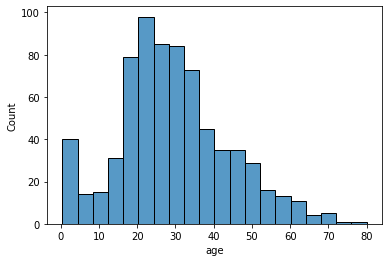

In [30]:
# step 9 check the normality / Standard normal distribution

sns.histplot(df['age'])

In [34]:
sns.histplot(df[['age','sex']],data=df)

TypeError: histplot() got multiple values for argument 'data'

<AxesSubplot:ylabel='Count'>

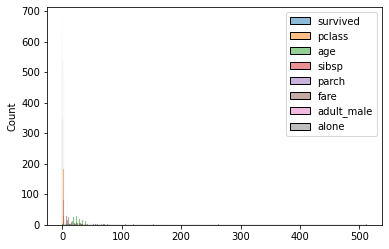

In [32]:
sns.histplot(df)

In [35]:
# measure its skewness and kurtosis
df['age'].agg(['skew','kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

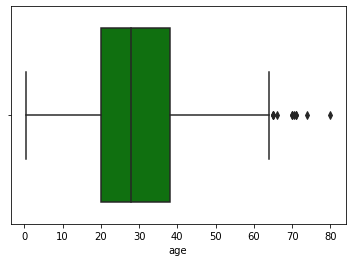

In [36]:
sns.boxplot(df['age'],color='g')

In [37]:
# Step 10
# Correlation
#Checking the correlation between variables is also necessary to see potential a feature that we can use for further analysis or building a model later.
# We can use a correlation matrix to get this.
# drawing correlation
corr = df.corr(method="pearson")  # you can use spearman if you want
corr
# this will display a correlation matrix
# relationship between variables

# assignment
# correlation between male and female
# correlation between fare
# and different correlation


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

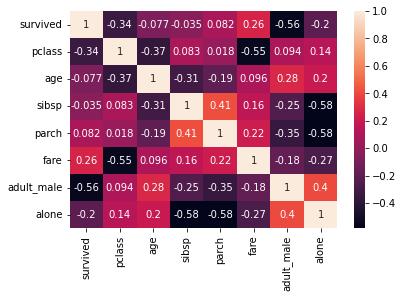

In [38]:
#We can also draw a heatmap of correlation matrix instead of reading number

sns.heatmap(corr, annot=True)
# this will show the numbers with colors


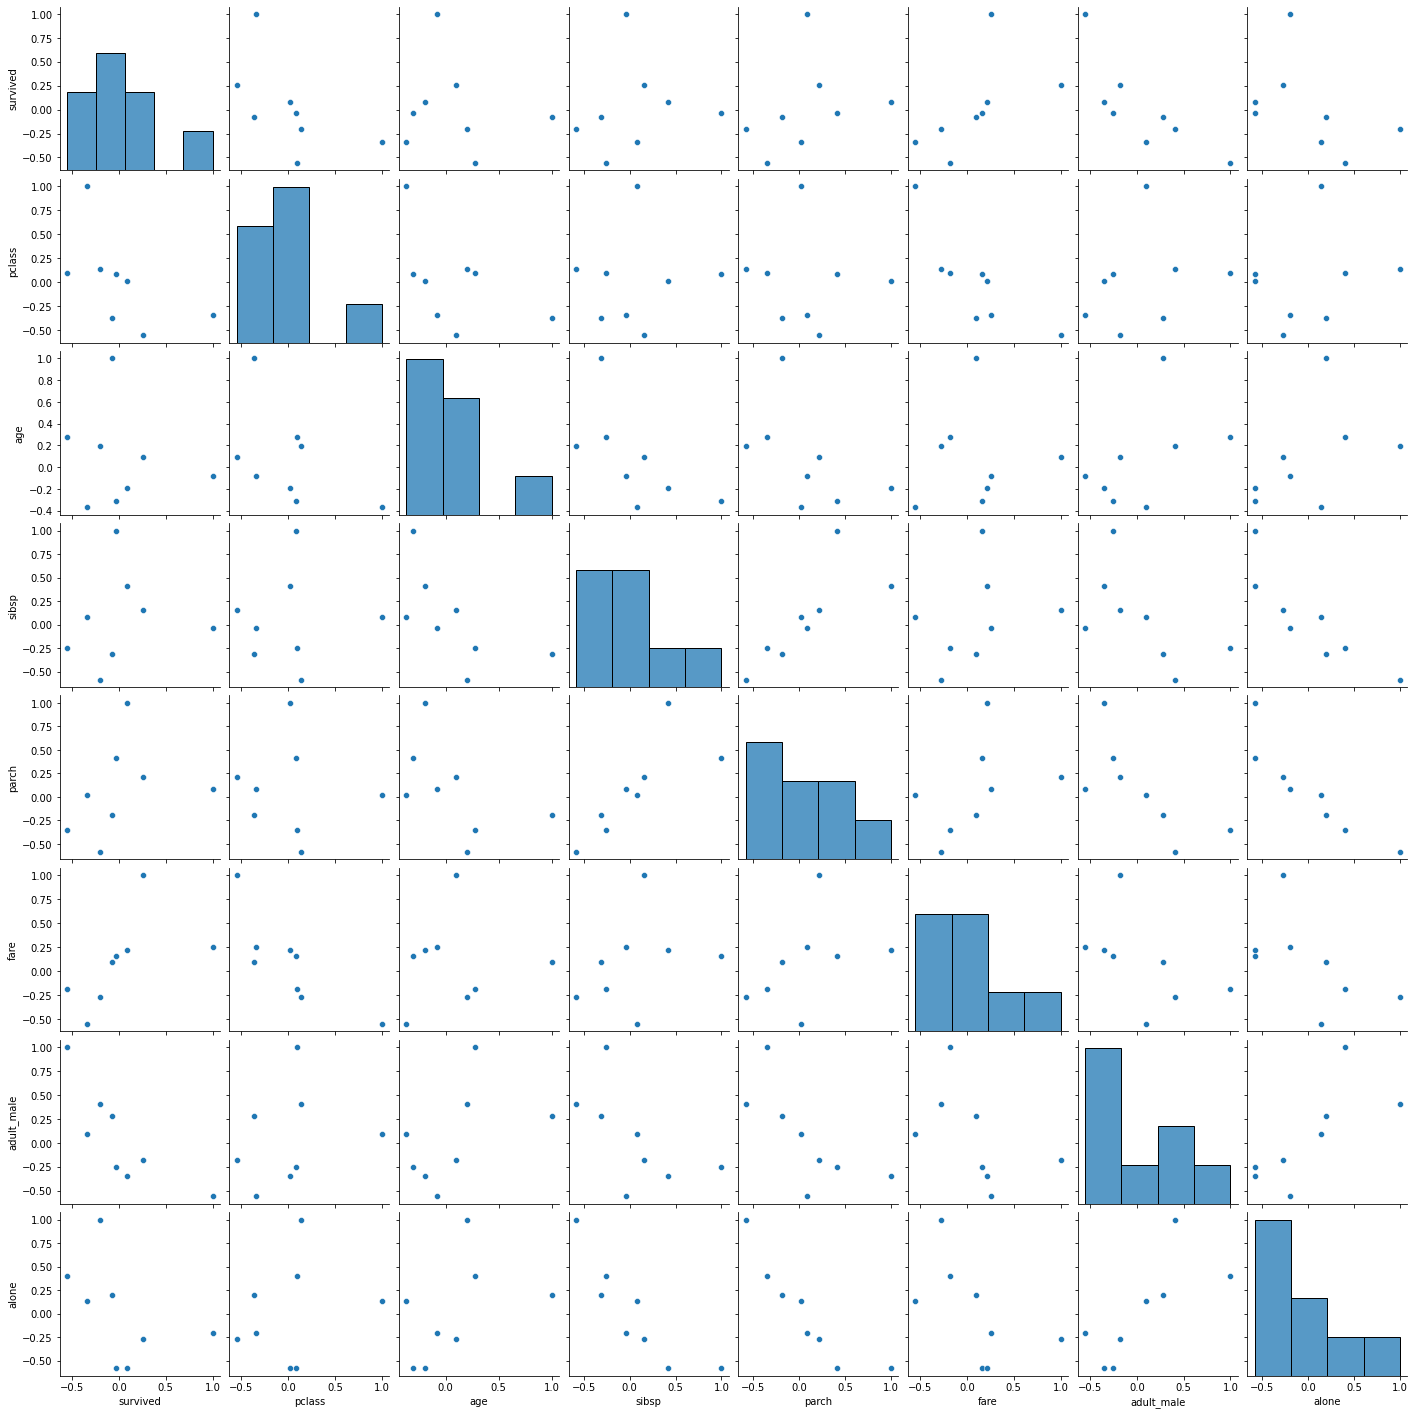

In [39]:
# we can also draw a pairplot to see the correlation
sns.pairplot(corr)


In [40]:
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000
